# K Means clustering 28 March

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Reading the data

In [2]:
df = pd.read_csv(r"C:\Users\rezaa\Videos\Captures\11.Machine Learning\2.K-MEANS CLUSTERING\2.K-MEANS CLUSTERING\Mall_Customers.csv")
df = df.drop(['CustomerID'],axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data visualization

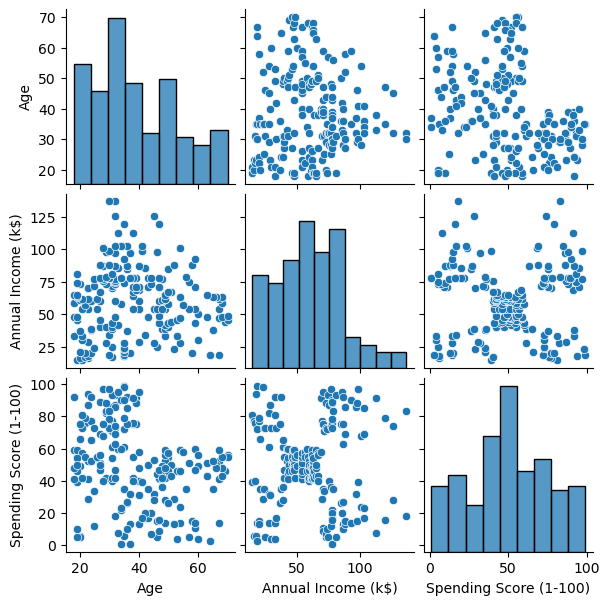

In [3]:
g = sns.pairplot(data=df)
g.fig.set_size_inches(6, 6)

**Conclusion:** Frrom the above plot it is clear that there is clustering of data between Annual Income and Spending Score

## Spliting the data

In [4]:
X = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X,test_size=0.2, random_state=0)

## Finding out the inertia value for optimum clustering

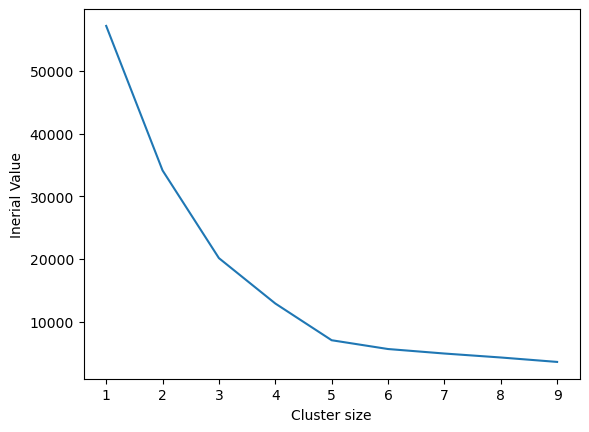

In [5]:
from sklearn.cluster import KMeans
iner = np.array([])
for cluster_size in range(1,10):
     model_KM = KMeans(n_clusters=cluster_size)
     model_KM.fit(X_test)
     iner = np.append(iner, model_KM.inertia_)
        
# Ploting the inertia value vs Cluster size
plt.plot(np.arange(1,len(iner)+1),iner)
plt.xlabel('Cluster size')
plt.ylabel('Inerial Value');

**Conclusion**: From the above plot it is clear that after number of clusters **5** there is a steady decrease in inertia 

## Ploting the clusters

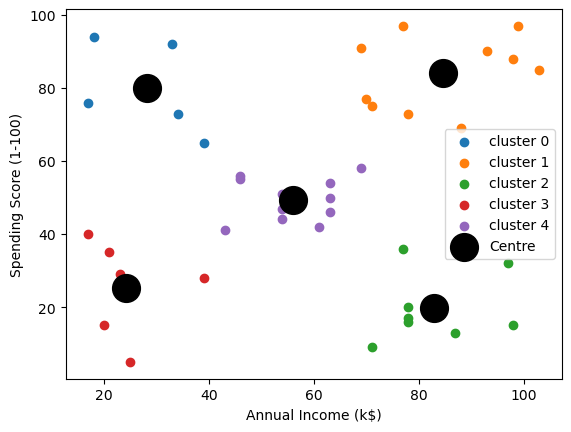

In [6]:
model_KM = KMeans(n_clusters=5)
y_pred = model_KM.fit_predict(X_test)
for n in range(5):
    plt.scatter(X_test[:,0][y_pred==n],X_test[:,1][y_pred==n],label=f'cluster {n}')

plt.scatter(model_KM.cluster_centers_[:,0],model_KM.cluster_centers_[:,1],c='k',s=400,label='Centre')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();